In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
# Read the data
X = pd.read_csv('../input/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')
XSales = X.copy()

y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

In [2]:
#X.Alley.fillna(3, inplace = True)
#X.Alley.replace("Grvl", 1, inplace = True)
#X.Alley.replace('Pave', 2, inplace = True)

#X_test_full.Alley.fillna(3, inplace = True)
#X_test_full.Alley.replace("Grvl", 1, inplace = True)
#X_test_full.Alley.replace('Pave', 2, inplace = True)


In [3]:
# Break off validation set from training data

def dataStart(X, y, rem, X_test_full):
    X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.75,
                                                                random_state=0)





    # "Cardinality" means the number of unique values in a column
    # Select categorical columns with relatively low cardinality (convenient but arbitrary)
    cat_cols = [cname for cname in X_train_full.columns if (X_train_full[cname].dtype not in ['int64', 'float64']) and cname not in rem]
    # Select numeric columns
    numeric_cols = [cname for cname in X_train_full.columns if (X_train_full[cname].dtype in ['int64', 'float64']) and cname not in rem]


    # One-hot encode the data (to shorten the code, we use pandas)
    #X_train = pd.get_dummies(X_train)
    #print(X_valid)
    #X_valid = pd.get_dummies(X_valid)
    #print(X_valid)
    #X_test = pd.get_dummies(X_test)
    #X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
    #X_train, X_test = X_train.align(X_test, join='left', axis=1)



    my_cols = cat_cols + numeric_cols
    X_train = X_train_full[my_cols]
    X_valid = X_valid_full[my_cols]
    X_test = X_test_full[my_cols]
    
    return X_train, X_valid, X_test, cat_cols, numeric_cols, y_train, y_valid



numTransformer = SimpleImputer(strategy = 'most_frequent')

In [4]:
def testPrep(X_test, cat_cols):
    X_test_transf = pd.DataFrame(numTransformer.transform(X_test))
    X_test_transf.columns = X_test.columns
    X_test_transf.index = X_test.index
    OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test_transf[cat_cols]))
    OH_cols_test.index = X_test_transf.index
    num_X_test = X_test_transf.drop(cat_cols, axis=1)
    X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
    X_test = X_test.apply(pd.to_numeric)
    
    return X_test

def dataPrep(X_train, X_valid, cat_cols, X_test):



    X_train_transf = pd.DataFrame(numTransformer.fit_transform(X_train))
    X_valid_transf = pd.DataFrame(numTransformer.transform(X_valid))




    X_train_transf.columns = X_train.columns
    X_valid_transf.columns = X_valid.columns


    X_train_transf.index = X_train.index
    X_valid_transf.index = X_valid.index



    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train_transf[cat_cols]))
    OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid_transf[cat_cols]))


    OH_cols_train.index = X_train_transf.index
    OH_cols_valid.index = X_valid_transf.index


    num_X_train = X_train_transf.drop(cat_cols, axis=1)
    num_X_valid = X_valid_transf.drop(cat_cols, axis=1)


    X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
    X_train = X_train.apply(pd.to_numeric)
    X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
    X_valid = X_valid.apply(pd.to_numeric)
    
    X_test_transf = pd.DataFrame(numTransformer.transform(X_test))
    X_test_transf.columns = X_test.columns
    X_test_transf.index = X_test.index
    OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test_transf[cat_cols]))
    OH_cols_test.index = X_test_transf.index
    num_X_test = X_test_transf.drop(cat_cols, axis=1)
    X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
    X_test = X_test.apply(pd.to_numeric)
    
    return X_train, X_valid, X_test



**Preprocessing Done**

**Start Finding Correlations to possible drop some irrelevant columns**

In [5]:
XSales

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
tooMuch = [col for col in XSales.columns if XSales[col].isnull().sum() > 720]
print(tooMuch)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [7]:
print(XSales['MiscFeature'].isnull().sum())

1406


In [8]:
print(XSales.Alley.unique())

[nan 'Grvl' 'Pave']


<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

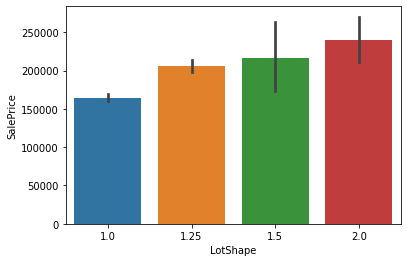

In [9]:
XSales.LotShape.replace("Reg",1, inplace = True)
XSales.LotShape.replace("IR1", 1.25, inplace = True)
XSales.LotShape.replace('IR3', 1.5, inplace = True)
XSales.LotShape.replace('IR2', 2, inplace = True)
sns.barplot(x=XSales.LotShape, y=XSales.SalePrice)

In [10]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
# Define the model
my_model_2 = XGBRegressor(random_state = 0, n_estimators = 850, learning_rate = 0.05,
                         max_depth = 3, min_child_weight = 5, subsample = 0.88, 
                        num_parallel_tree = 4)


# Fit the model
errorList = []
droppedList = []

def runModel(X_train, y_train, X_valid, y_valid, errorList, droppedList, X_test):
    



    my_model_2.fit(X_train, y_train, early_stopping_rounds = 50, eval_set = [(X_valid, y_valid)], verbose = False) # Your code here

    # Get predictions
    predictions_2 = my_model_2.predict(X_valid) 
    # Calculate MAE
    mae_2 = mean_absolute_error(y_valid, predictions_2) 

    # Uncomment to print MAE
    
    
    #errorList.append(round((14857.8005565 - mae_2)/14857, 3))
    #droppedList.append(column)
    
    print("Mean Absolute Error: " + str(mae_2))
    
    
    
    print(X_train.columns)
    print(X_test.columns)
    preds_test = my_model_2.predict(X_test)
    print(preds_test)
    
    return preds_test
    

    



rem = ['LotFrontage', 'LotShape', 'LandContour', 'Condition2', 'MasVnrArea', 'TotRmsAbvGrd', 'GarageType', 'GarageFinish', 'WoodDeckSF', 'MoSold', 'SaleType']
X_train, X_valid, X_test, cat_cols, numeric_cols, y_train, y_valid = dataStart(X,y, rem, X_test_full)    
X_train, X_valid, X_test = dataPrep(X_train, X_valid, cat_cols, X_test)
print(X_train)
print(X_test)
preds_test = runModel(X_train, y_train, X_valid, y_valid, errorList, droppedList, X_test)
    
    
    


      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                             
1293          70     6600            5            4       1892          1965   
1019          80    10784            7            5       1991          1992   
1214          80    10246            4            9       1965          2001   
1431          60    21930            5            5       2005          2005   
811           20    10140            6            6       1974          1999   
...          ...      ...          ...          ...        ...           ...   
764           60     9430            8            5       1999          1999   
836           20     9600            4            7       1950          1995   
1217          90     8930            6            5       1978          1978   
560          120     3196            7            5       2003          2004   
685           60    16770            7  

In [11]:
#removeList = []
#for i in range(0, len(droppedList)):
 #   if errorList[i] >= 0.01:
  #      print(droppedList[i])
   #     removeList.append(droppedList[i])
#print(removeList)

In [12]:
#testing stacking
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import r2_score

#def algorithm_pipeline(X_train, X_valid, y_train, y_valid, 
#                       model, param_grid, cv=3, scoring_fit='neg_mean_squared_error',
#                       scoring_test=r2_score, do_probabilities = False):
#    gs = GridSearchCV(
#        estimator=model,
#        param_grid=param_grid, 
#        n_jobs=-1, 
#        cv = 2,
#        scoring=scoring_fit,
#        verbose=4
#    )
#    print('start')
#    fitted_model = gs.fit(X_train, y_train)
#    print('fit')
#    best_model = fitted_model.best_estimator_
#    print('estimated')
#    
#    if do_probabilities:
#      pred = fitted_model.predict_proba(X_valid)
#      print('proba')
#    else:
#      pred = fitted_model.predict(X_valid)
#     print('no')
    
#    score = scoring_test(y_valid, pred)
    
 #   return [best_model, pred, score]


In [13]:
#from sklearn.ensemble import RandomForestRegressor
#from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor

# Defining our estimator, the algorithm to optimize
#models_to_train = [XGBRegressor(), 
#                   LGBMRegressor(), 
#                   RandomForestRegressor()]

# Defining the hyperparameters to optimize
#grid_parameters = [
#    { # XGBoost
#        'n_estimators': [850],
#        'colsample_bytree': [0.6, 0.7, 0.8],
#        'max_depth': [3],
#        'reg_alpha': [1.3],
#        'reg_lambda': [1.3],
#        'subsample': [0.88],
#        'random_state': [0],
#        'learning_rate': [0.05],
#        'min_child_weight': [5],
#        'num_parallel_tree': [4],
#    },
#    { # LightGBM
#        'n_estimators': [500, 1000],
#        'learning_rate': [0.03, 0.06, 0.12],
#        'colsample_bytree': [0.7, 0.8],
#        'max_depth': [4],
#        'num_leaves': [20],
#        'reg_alpha': [1.2],
#        'reg_lambda': [1.2],
#        'min_split_gain': [0.3],
#        'subsample': [0.8],
##    }, 
  #  { # Random Forest
  #      'max_depth':[10], 
  #      'n_estimators':[900],
  #      'max_features':[10]
  #  }
#]
#models_preds_scores = []

#for i, model in enumerate(models_to_train):
 #   params = grid_parameters[i]
  #  
   # result = algorithm_pipeline(X_train, X_valid, y_train, y_valid, 
    #                             model, params)
#    models_preds_scores.append(result)
 #   print(i)
  #  
#for result in models_preds_scores:
#    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2]))

In [14]:
#from mlxtend.regressor import StackingCVRegressor
#from sklearn.linear_model import Ridge, Lasso
#from sklearn.svm import SVR
#from sklearn.ensemble import RandomForestRegressor
#from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor

#xgb = XGBRegressor()
#lgbm = LGBMRegressor()
#rf = RandomForestRegressor()
#ridge = Ridge()
#lasso = Lasso()
#svr = SVR(kernel='linear')

#stack = StackingCVRegressor(regressors=(ridge, lasso, svr, rf, lgbm, xgb),
 #                           meta_regressor=xgb, cv=12,
  #                          use_features_in_secondary=True,
   ##                        shuffle=False,
     #                       random_state=42)

#stack.fit(X_train, y_train)
#testing = stack.predict(X_valid)
#t1 = mean_absolute_error(y_valid, testing)
#print(t1)
#pred = stack.predict(X_test)


In [15]:
#print(y_valid)
#print(len(pred))
#X_test

In [16]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)
print('done')
print(preds_test)

done
[120543.01  159640.36  187588.02  ... 161250.23  116760.125 229962.5  ]
